## Gradient descent

### 導數

導數指的是函數y=f(x)在某一點處沿x軸正方向的變化率

<img src="pics/Derivative.png" alt="Derivative" style="width: 400px">

一般微積分說將要找極大值或極小值的式子做微分等於0找解，找到的不是極大值，就是極小值，是極大還是極小就看二階導數帶入找出來的解，看結果是大於0，還是小於0。

<img src="pics/limitation values.png" alt="limitation values" style="width: 400px">

<img src="pics/example1.png" alt="example1" style="width: 300px">

這個範例是可以找的到唯一解的式子，但在實際應用根本不可能向微積分考試這麼理想一定找得到唯一解，這時候就必須要靠找近似解的方式去逼近極值，也就是這篇要說的梯度下降法(gradient descent)。

在訓練模型時，假設今天初始參數為𝜃，目標函數J(𝜃)則為損失函數(loss function)，要最小化loss，我們要將參數沿著梯度相反的方向成長，這樣有點抽象，我們來看一個例子：

今天L = (y - wx - b)² 是我們要處理的損失函數，函數以 y = x³ + x² + x 為範例

No handles with labels found to put in legend.


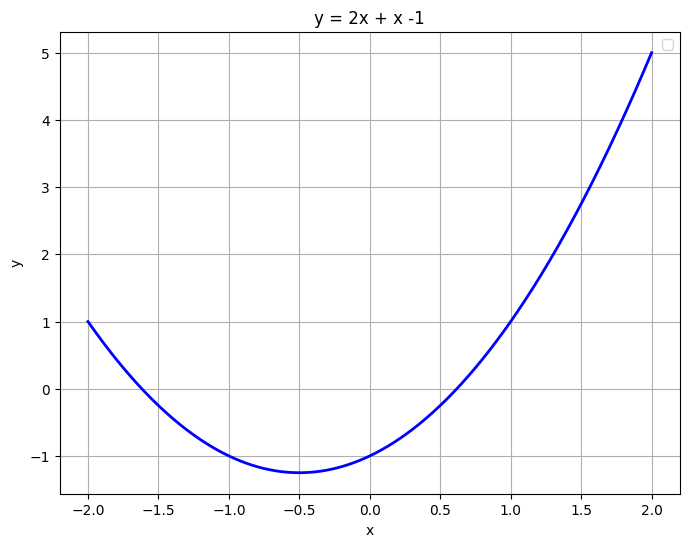

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 400)  

y = x**2 + x -1

plt.figure(figsize=(8, 6))
plt.plot(x, y, color='b', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = 2x + x -1')
plt.grid(True)
plt.legend()
plt.show()


接著我們把y = x³ + x² + x 對x作微分，會得到函數y’

y’ = 3x + 2x + 1


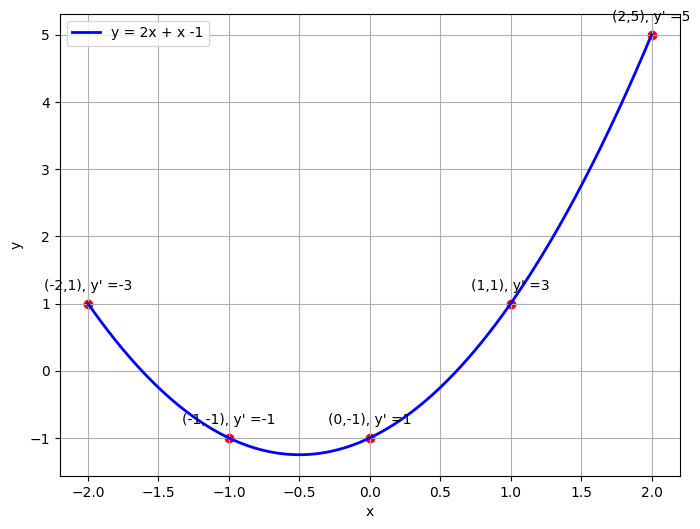

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 400) 


y = x**2 + x -1


plt.figure(figsize=(8, 6))
plt.plot(x, y, label='y = 2x + x -1', color='b', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

x_points = [-2, -1, 0, 1, 2]
y_points = [x**2 + x -1 for x in x_points]
y_de_point = [2*x + 1  for x in x_points]
plt.scatter(x_points, y_points, color='r', marker='o')

for i, (xi, yi, de_y) in enumerate(zip(x_points, y_points, y_de_point)):
    plt.annotate(f"({xi},{yi}), y' ={de_y}", (xi, yi), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.show()


我們就得到了數值移動的方向的判定方法: 將x帶入微分後的函數y’，得到的數值如果是正，表示y是往正數移動，得到的數值如果是負，表示y是往負數移動。

這邊我們知道了，**數值移動的方向是可以從梯度判定的**

所以只需要將參數沿著梯度相反的方向前進一個步長，就可以實現目標函數（loss function）的下降。這個步長
又稱為學習速率。參數更新公式如下：

𝜃⟵𝜃−𝜂.∇𝐽(𝜃)

### 學習速率(Learning rate)

<img src="pics/learning rate.png" alt="learning rate" style="width: 300px">

Learning Rate對模型梯度下降的學習影響重大，如果Learning Rate太小，網路容易訓練緩慢，Learning Rate太大又容易無法收斂

而在訓練神經網路很容易忽略learning rate 的設計，畢竟learning rate 對整體的效果很難有立即見效的效果，但是設計一個良好的Learning Rate策略，對整個模型的效果至關重要

### Gradient descent implement

今天我們用MSE當損失函數來implement Gradient descent

In [64]:
# Data
np.random.seed(0) 
X = np.random.rand(200) * 100
Y = 2 * X + 1 + np.random.randn(200) * 100

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def mean_squared_error(y_true, y_predicted):
     
    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost

Iteration 1: Cost 18052.30926348908, Weight         1.1848906798578769, Bias 0.026969198519402153
Iteration 2: Cost 10177.754125322705, Weight         1.551316216009401, Bias 0.0330765971431827
Iteration 3: Cost 9279.414850885896, Weight         1.6750739303517002, Bias 0.03551531051908091
Iteration 4: Cost 9176.928633761878, Weight         1.7168684873636217, Bias 0.03671487539151927
Iteration 5: Cost 9165.234058256226, Weight         1.7309792787035292, Bias 0.03749588882947381
Iteration 6: Cost 9163.89707616306, Weight         1.735739638804216, Bias 0.03813551459784391
Iteration 7: Cost 9163.741698034106, Weight         1.7373418100832032, Bias 0.038727367158539874
Iteration 8: Cost 9163.721118639041, Weight         1.7378772760236374, Bias 0.039303065607389234
Iteration 9: Cost 9163.715917484138, Weight         1.738052453278045, Bias 0.039873289568627145
Iteration 10: Cost 9163.71247097072, Weight         1.738105940186298, Bias 0.04044164617868403
Iteration 11: Cost 9163.7092249

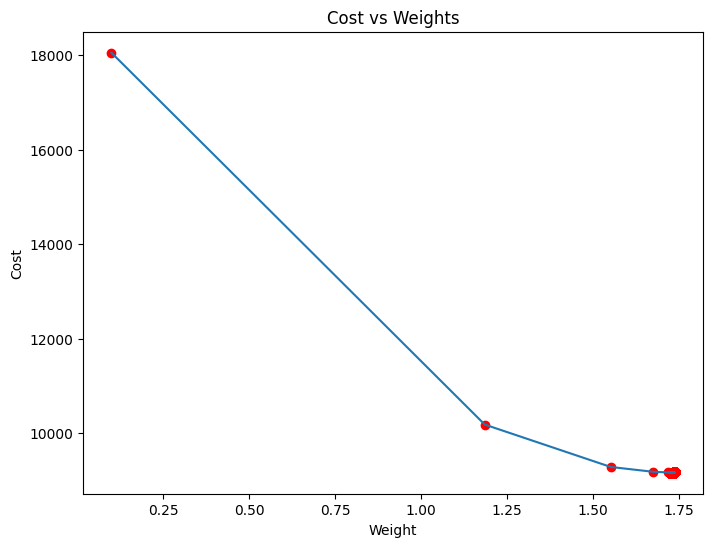

Estimated Weight: 1.7218682059326123
Estimated Bias: 1.1166006551010461


In [61]:
# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001,
                     stopping_threshold = 1e-6):
     
    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
     
    costs = []
    weights = []
    previous_cost = None
     
    # Estimation of optimal parameters
    for i in range(iterations):
         
        # Making predictions
        y_predicted = (current_weight * x) + current_bias
         
        # Calculating the current cost
        current_cost = mean_squared_error(y, y_predicted)
 
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(current_weight)
         
        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
         
        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
                 
        # Printing the parameters for each 1000th iteration
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        {current_weight}, Bias {current_bias}")
     
     
    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
     
    return current_weight, current_bias
 

# Estimating weight and bias using gradient descent
estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=2000)
print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

### mini-batch gradient descent

若拿整個訓練集做梯度下降演算法時，必須處理過所有的訓練資料，才能踏出梯度下降的一小步，然後你必須再處理過整個訓練集。例如有五百萬筆資料，每處理完五百萬筆，才能再踏出梯度下降的另一小步。

因此就有了mini-batch gradient descent，我們把訓練集分割成小一點的子訓練集，這些子集被取名為mini-batch。假設每個mini-batch中有1000個樣本，那麼500萬個樣本總共可劃分為5000個mini-batch。

Iteration 1: Cost 7450.3005542066685, Weight 1.5510342411141296, Bias 0.06686511343735375
Iteration 2: Cost 7450.374716303034, Weight 1.5504672982095733, Bias 0.10048356483733469
Iteration 3: Cost 7450.449745815723, Weight 1.5499017224691498, Bias 0.13402094644954787
Iteration 4: Cost 7450.525635613049, Weight 1.5493375105959875, Bias 0.1674774537711151
Iteration 5: Cost 7450.602378604804, Weight 1.5487746593011655, Bias 0.20085328182772313
Iteration 6: Cost 7450.679967742036, Weight 1.5482131653036943, Bias 0.2341486251747612
Iteration 7: Cost 7450.758396016843, Weight 1.5476530253304959, Bias 0.2673636778984541
Iteration 8: Cost 7450.837656462143, Weight 1.547094236116385, Bias 0.3004986336169944
Iteration 9: Cost 7450.917742151471, Weight 1.5465367944040513, Bias 0.33355368548167075
Iteration 10: Cost 7450.998646198769, Weight 1.5459806969440382, Bias 0.36652902617799377
Iteration 11: Cost 7451.08036175816, Weight 1.5454259404947255, Bias 0.3994248479268193
Iteration 12: Cost 7451.1

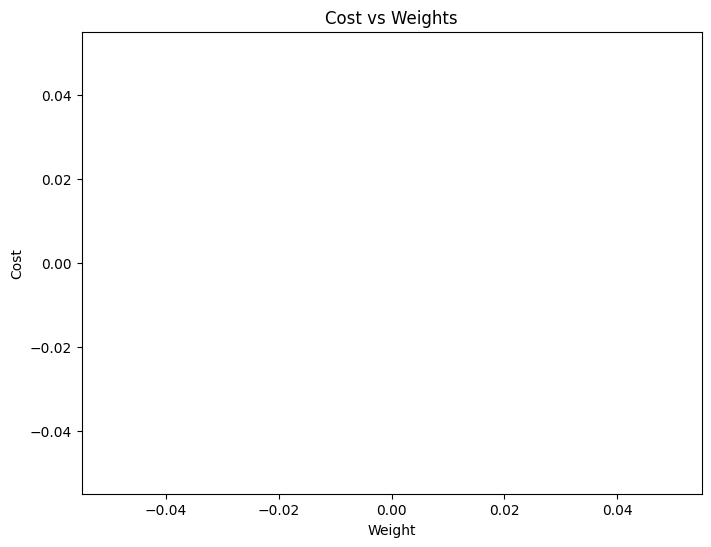

Estimated Weight: 1.5248027308103402
Estimated Bias: 1.6223352449248243


In [74]:
def mini_batch_gradient_descent(x, y, batch_size=4, iterations=100, learning_rate=0.0001, stopping_threshold=1e-6):
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
    costs = []
    weights = []
    previous_cost = None

    for i in range(iterations):

        for j in range(0, len(x), batch_size):
            # Select a mini-batch of data
            x_batch = x[j:j + batch_size]
            y_batch = y[j:j + batch_size]

            y_predicted = (current_weight * x_batch) + current_bias
            current_cost = mean_squared_error(y_batch, y_predicted)


            previous_cost = current_cost

            weight_derivative = -(2 / len(x_batch)) * np.sum(x_batch * (y_batch - y_predicted))
            bias_derivative = -(2 / len(x_batch)) * np.sum(y_batch - y_predicted)

            current_weight = current_weight - (learning_rate * weight_derivative)
            current_bias = current_bias - (learning_rate * bias_derivative)

        print(f"Iteration {i+1}: Cost {current_cost}, Weight {current_weight}, Bias {current_bias}")

    plt.figure(figsize=(8, 6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()

    return current_weight, current_bias


estimated_weight, estimated_bias = mini_batch_gradient_descent(X, Y, iterations=50)
print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")
